# Copy train/tests folders
To avoid uploading large file size, the train, test1, and test2 folders are removed from our submissions.
Please kindly help to copy the folder train, test1, and test1 to this project folder (same location as this file).

# Dependency Installations
Please refer to the file `requirements.txt` for the list of packages used in this program. Some of the specific machine learning libraries, there will be codes regarding installations. However, for those common libraries (such as numpy, matplotlib, etc), we assumed that already available.

# Instructions
Please run the following sections starting from Splitting data until before the Training.
If you would like to continue the training process please consider increase the `max_iter` key in the configuration variable. If you do not want to run the training, it just run through the train section, it will skip the training since we've done the training.

Most of the data was pre-processed so will execute quickly. Those take longer time there was the time recorded using %timeit to let the users know how long it may take.

# Detectron2 installations
Make sure to install detectron2 and its dependencies by enabling the following lines if you haven't done so.


In [1]:
# # install dependencies:
# !pip install pycocotools>=2.0.1
# import torch
# print(torch.__version__, torch.cuda.is_available())
# !gcc --version
# # Make sure also to install opencv (assumed to be pre-installed)
# # install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# # See https://detectron2.readthedocs.io/tutorials/install.html for instructions
# assert torch.__version__.startswith("1.6")
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

# Splitting data

The stratify is by country and then by the damage type with lowest number of occurences.

In [2]:
 %load_ext autotime

In [3]:
from data_processing import split_train_data, process_tests, load_train_eval_splits, load_tests
import warnings
warnings.filterwarnings("ignore")

time: 986 ms


In [4]:
# Process train/evaluation splits
split_train_data()

Records for train split exists
Records for evaluation split exists
time: 394 µs


In [5]:
# Process tests
process_tests(["test1", "test2"])

test1 exists
test2 exists
time: 3.27 ms


# Loading the processed data

In [6]:
train_dicts, eval_dicts = load_train_eval_splits()
test1_dicts, test2_dicts = load_tests()

time: 148 ms


In [7]:
print(len(train_dicts), len(eval_dicts), len(test1_dicts), len(test2_dicts))

10974 1221 2631 2664
time: 922 µs


# Data Exploration
See split balance

In [8]:
from vis_utils import plot_damage_distributions

time: 199 ms


0 : 5923
1 : 3992
2 : 7513
3 : 5044


[5923, 3992, 7513, 5044]

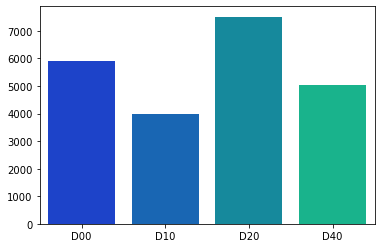

time: 133 ms


In [9]:
plot_damage_distributions(train_dicts)

0 : 669
1 : 454
2 : 868
3 : 583


[669, 454, 868, 583]

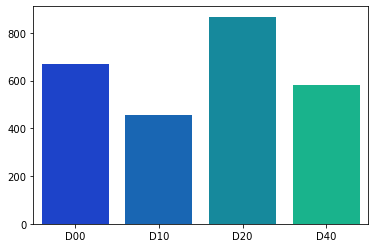

time: 97.9 ms


In [10]:
plot_damage_distributions(eval_dicts)

In [11]:
# Import dependencies
import torch
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from cv2 import imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import ColorMode

import time
import datetime

time: 3.94 ms


# Data Preparation

In [12]:
model_type='x101_change_ratios'
OUTPUT_DIR = f'./{model_type}_output'
OUTPUT_DIR

'./x101_change_ratios_output'

time: 3.17 ms


In [13]:
from data_processing import prepare_data
road_damage_metadata = prepare_data(OUTPUT_DIR, train_dicts, eval_dicts, test1_dicts, test2_dicts)

[10/20 14:58:22 d2.data.datasets.coco]: Converting annotations of dataset 'road_damage_train' to COCO format ...)
[10/20 14:58:22 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[10/20 14:58:24 d2.data.datasets.coco]: Conversion finished, #images: 10974, #annotations: 22472
[10/20 14:58:24 d2.data.datasets.coco]: Caching COCO format annotations at './x101_change_ratios_output/road_damage_train_coco_format.json' ...
[10/20 14:58:25 d2.data.datasets.coco]: Converting annotations of dataset 'road_damage_eval' to COCO format ...)
[10/20 14:58:25 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[10/20 14:58:25 d2.data.datasets.coco]: Conversion finished, #images: 1221, #annotations: 2574
[10/20 14:58:25 d2.data.datasets.coco]: Caching COCO format annotations at './x101_change_ratios_output/road_damage_eval_coco_format.json' ...
[10/20 14:58:25 d2.data.datasets.coco]: Converting annotations of dataset 'road_damage_test1' to COCO format ...)
[10/20 14:58:25 

In [1]:
from train_helper import configure_model
train_config = {
    'OUTPUT_DIR': OUTPUT_DIR,
    'base_config_file': "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml", #'COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml', # X101 is more accurate but slow
    'base_weight_file': "detectron2://ImageNetPretrained/FAIR/X-101-32x8d.pkl", #'detectron2://ImageNetPretrained/MSRA/R-101.pkl', # X101 is more accurate but slow
    'max_iter': 50000,
    'num_gpus': 2,
    'ims_per_batch': 16,
    'learning_rate': 0.00025,
    'sizes':[32, 64, 128, 256], 
    'aspect_ratios':[0.1, 0.5, 1.0, 1.5]
}
cfg = configure_model(**train_config)

NameError: name 'OUTPUT_DIR' is not defined

# Training
If you would like to continue the training process please increase the `max_iter` field in the previous cell, otherwise you can continue to run or safely skip the training cell. If you continue to run without changing `max_iter`, since we resume from previous epochs, so it will stop (it is not an error, just continue to evaluation part).

In [2]:
from my_detectron2_trainer import MyTrainer

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = MyTrainer(cfg) 
trainer.resume_or_load(resume=True)
trainer.train()

NameError: name 'os' is not defined

In [16]:
cfg.OUTPUT_DIR

'./x101_change_ratios_output'

time: 1.17 ms


# View training history via TensorBoard
Please comment the cell belows if you don't have tensorboard.

In [17]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir x101_change_ratios_output --host localhost


time: 8.64 s


# Evaluations
This section we will evaluate checkpoints at different iterations (specified in `the_max_iters` variable) and select the best model and the best object classification threshold. Tentatively 30 minutes, depending to the hardware's configuration.

In [18]:
import detectron2
import evaluator
from evaluator import predict, evaluate_model, predict_with_tta, evaluate_models, get_evaluation_configuration

time: 3.09 ms


In [ ]:
# about 7 minutes each model (might be different depending on hardware configuration)
the_max_iters = [49999, 54999, 59999, 64999, 69999, 74999, 79999, 84999, 89999, 94999, 99999] # these are the latest checkpoints while training
the_model_names = [f"model_{str(iters).zfill(7)}" for iters in the_max_iters]
model_bests, threshold_bests, f1_bests = evaluate_models(cfg, eval_dicts, the_model_names)

Evaluating model model_0049999
Done inferences in 2.007821524143219 minutes at 2020-10-20 15:01:03.242726
model_0049999 max f1 0.5058461538461538 at 0.5700000000000003
Evaluating model model_0054999
Done inferences in 2.0334243297576906 minutes at 2020-10-20 15:03:25.606056
model_0054999 max f1 0.5234390584480352 at 0.5500000000000003
Evaluating model model_0059999


# The best moodel info

In [ ]:
print(f'The  best model is {the_model_names[np.argmax(model_bests)]}')
print(f'Its  score  threshold is {threshold_bests[np.argmax(model_bests)]}')
print(f'Its best f1 score is {max(model_bests)}')

# Use the best model to produce outputs

In [ ]:
import numpy as np

from processing_utils import submissions_for_outputs

In [ ]:
the_best_model = the_model_names[np.argmax(model_bests)]
the_model_name =  the_best_model
the_best_score_threshold = threshold_bests[np.argmax(model_bests)]
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, f"{the_model_name}.pth")

### test1

In [ ]:
# about 7 minutes (might be different depending on hardware configuration)
test1_output_items = predict(test1_dicts, cfg)

In [ ]:
file_name = f'test1'
test1_output_lines = submissions_for_outputs(file_name, test1_dicts, test1_output_items, score_thresh_test=the_best_score_threshold, top_n=5)

### test2

In [ ]:
# about 7 minutes (might be different depending on hardware configuration)
test2_output_items = predict(test2_dicts, cfg)

In [ ]:
file_name = f'test2'
test2_output_lines = submissions_for_outputs(file_name, test2_dicts, test2_output_items, score_thresh_test=the_best_score_threshold, top_n=5)

# Visualizations
Visualize 10 images from each test dataset

In [ ]:
# force reloading
import vis_utils
import importlib
importlib.reload(vis_utils)
from vis_utils import visualize_sample_outputs

In [ ]:
visualize_sample_outputs(test1_dicts, test1_output_lines, 10)

In [ ]:
visualize_sample_outputs(test1_dicts, test1_output_lines, 10)

# TTA


In [ ]:
import copy

import detectron2.data.detection_utils as utils
def predict_batches(eval_dicts, batch_size=10):
    def get_test_batch(test_dicts, batch_size=batch_size):
        l = len(test_dicts)
        for ndx in range(0, l, batch_size):
            batch_data = test_dicts[ndx:min(ndx+batch_size, l)]
            ret = []
            for dataset_dict in batch_data:
                dataset_dict = copy.deepcopy(dataset_dict)
                image = utils.read_image(dataset_dict.pop("file_name"), format="BGR").copy()
                image = torch.from_numpy(image).permute(2, 0, 1)  # CHW
                dataset_dict["image"] = image
                ret.append(dataset_dict)
            # read data for it
            yield ret
    
    output_items = []
    for batch1 in get_test_batch(eval_dicts, batch_size=10):
        batch_output_items = predict_with_tta(batch1, cfg, score_thresh_test=0.5)
        output_items += batch_output_items
    return output_items

In [ ]:
the_best_model

In [ ]:
the_model_name =  the_best_model
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, f"{the_model_name}.pth")
cfg.TEST.AUG.MIN_SIZES = (600, 700)

output_items = predict_batches(eval_dicts, batch_size=32)
score_thresh_tests = np.arange(0.5, 1.0, 0.01)
model_evals = evaluate_model(eval_dicts, output_items, score_thresh_tests)
import matplotlib.pyplot as plt
plt.plot(score_thresh_tests, model_evals)
max_idx = np.argmax(model_evals)
print(f'max f1 {model_evals[max_idx]} at {score_thresh_tests[max_idx]}')